In [1]:
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


In [2]:
encoding_dim=64

input_img=Input(shape=(784,))

encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)

In [3]:
encoder=Model(input_img,encoded)

In [4]:
encoded_input=Input(shape=(encoding_dim,))

decoder_layer=autoencoder.layers[-1]

decoder=Model(encoded_input,decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
from keras.datasets import mnist
import numpy as np
(xtrain,_),(xtest,_)=mnist.load_data()
xtrain.shape
len(xtrain)
xtrain.shape[1:]

(28, 28)

In [7]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
xtrain=xtrain.reshape(len(xtrain),np.prod(xtrain.shape[1:]))
xtest=xtest.reshape(len(xtest),np.prod(xtest.shape[1:]))


In [8]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest,xtest))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.3415 - val_loss: 0.2677
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2569 - val_loss: 0.2420
Epoch 3/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2303 - val_loss: 0.2170
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2099 - val_loss: 0.2005
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1960 - val_loss: 0.1887
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1855 - val_loss: 0.1794
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1772 - val_loss: 0.1720
Epoch 8/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1703 - val_loss: 0.1658
Epoch 9/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1645 - val_loss: 0.1603
Epoc

In [11]:
encoded_imgs=encoder.predict(xtest)
decoded_imgs=decoder.predict(encoded_imgs)

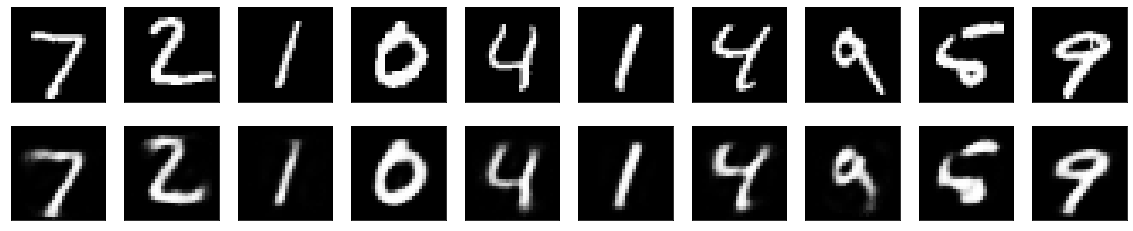

In [12]:
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    # display orignial
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()